In [2]:
import pandas as pd
import numpy as np

# Review Importing data

- `pd.read_csv()`, read from text file (don't need to be `.csv` extension)

- separators: `,`, `;`,`|`, `#`,`\t` 

- encoding: `utf-8`, `latin1`

- read from excel: `many arguments you can look up`

- read from url: `find the url for the csv file and plug it on pd.read_csv`

- read from gsheets: `use function provided to read from accessible link of google sheets`


In [3]:
# read vehicles.csv from `data` folder

In [4]:
df = pd.read_csv('data/vehicles.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/vehicles.csv'

In [ ]:
pd.read_csv('../pandas-data-manipulation-part1/data/vehicles.csv')

In [ ]:
# pd.read_csv('data/vehicles_tab.txt', sep='\t')
pd.read_csv('data/CSV.8859-1.csv', encoding='latin1', sep=';', nrows=10)

# Importing files from URLs

Example: https://github.com/rfordatascience/tidytuesday

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

https://www.stats.govt.nz/large-datasets/csv-files-for-download/

In [ ]:
pd.read_csv('https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2019-financial-year-provisional/Download-data/annual-enterprise-survey-2019-financial-year-provisional-csv.csv')

## Cool Application: Google Sheets

- get the shareable link and replace the last piece of the url
    - replace `'/edit?usp=sharing'` by `'/export?format=csv'`
    
(https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe)

In [5]:
def read_from_gsheet(url):
    ''' 
    Read from a google sheet 
    
    Example: https://forms.gle/kJESnYvequZkJbMH6
    '''

    working_spreadsheet = url.replace('/edit?usp=sharing','/export?format=csv')
    
    return pd.read_csv(working_spreadsheet)
    

In [6]:
url = 'https://docs.google.com/spreadsheets/d/1FGLH-CKdDEMLKVP0Hrjx_Uc5Tcb_6ywTK8KOMnMYA6E/edit?usp=sharing'

read_from_gsheet(url)

,Carimbo de data/hora,Idade,Altura
0,04/08/2020 19:48:20,> 35,187
1,04/08/2020 19:48:24,> 35,182
2,04/08/2020 19:48:25,> 35,170
3,04/08/2020 19:48:25,Entre 31 e 35,173
4,04/08/2020 19:48:25,Entre 26 e 30,175
5,04/08/2020 19:48:26,Entre 20 e 25,156
6,04/08/2020 19:48:30,Entre 26 e 30,152
7,04/08/2020 19:48:31,Entre 26 e 30,161
8,04/08/2020 19:48:33,Entre 31 e 35,189
9,04/08/2020 19:48:33,> 35,167


In [13]:
read_from_gsheet(url).iloc[:, 1]

0              > 35
1              > 35
2              > 35
3     Entre 31 e 35
4     Entre 26 e 30
5     Entre 20 e 25
6     Entre 26 e 30
7     Entre 26 e 30
8     Entre 31 e 35
9              > 35
10    Entre 26 e 30
11    Entre 20 e 25
12    Entre 31 e 35
13    Entre 31 e 35
14              <20
Name: Idade, dtype: object

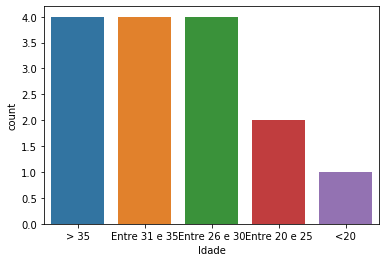

In [8]:
# automatizar relatorios
import seaborn as sns

sns.countplot(read_from_gsheet(url).iloc[:, 1])

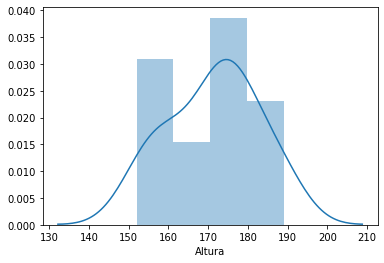

In [9]:
import matplotlib.pyplot as plt


sns.distplot(read_from_gsheet(url).iloc[:, 2].drop(14));

# Exporting datasets

## Export TO CSV

In [10]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.to_csv('data/exemplo.csv')

In [ ]:
pd.read_csv('data/exemplo.csv', index_col=0)

In [ ]:
df.to_csv('data/exported_file_v1.csv')

In [ ]:
df.to_csv('data/exported_file_v1.csv', index=False)

In [ ]:
pd.read_csv('data/exported_file_v1.csv')

In [ ]:
# pd.read_csv('data/exported_file_v2.csv', index_col=0)

**NOTE**: If you do not specify the argument `index=False`, the output in the csv file will create an unnamed index column with the *dataframe indexes*.

In [ ]:
df.to_csv('data/exported_file.csv', index=False)

## Export to csv using a specific separator

### Semicolon

In [ ]:
df.to_csv('data/exported_file_semicolon.csv', index=False, sep=';')

### Pipe

In [ ]:
df.to_csv('data/exported_file_pipe.csv', index=False, sep='|')

### plust or minus

In [ ]:
df.to_csv('data/exported_file_plusminus.csv', index=False, sep='±')

## Export TO EXCEL

In [ ]:
df.to_excel('data/aldrey_treated_newversion.xlsx', sheet_name='treated')

----

# Import and export JSON files

What is a JSON file?

**Examples:**

JSON 1:
```json
{ "name":"John", "age":30, "car":null }
```

JSON 2: 
```json
{"students":[
   {"name":"Andre", "age":23, "state":"SP"},
   {"name":"Rafael", "age":28, "state":"RJ"},
   {"name":"Claudia", "age":32, "state":"PA"},
   {"name":"Lajos", "age":28, "state":"MA"}
]}
```

In [12]:
data = pd.read_json('data/vehicles.json')

ValueError: Expected object or value

In [ ]:
data.head()

For a JSON file, you can have different `orient` options.

`'split'`: Dictionary containing indexes, columns, and data.

`'index'`: Nested dictionaries containing `{index:{column:value}}`.

`'columns'`: Nested dictionaries containing `{column:{index:value}}`.

`'values'`: Nested list where each sublist contains the values for a record.

`'table'`: Nested dictionaries containing schema (types) and data (records).

In [163]:
data.sample(10, random_state=42)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
22550,Mazda,626,1994,2.0,4,Manual 5-spd,Front-Wheel Drive,Midsize Cars,Regular,12.677308,23,31,26,341.807692,1300
17714,Honda,Ridgeline Truck 4WD,2012,3.5,6,Automatic 5-spd,All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,19.388824,15,21,17,522.764706,1950
25440,Mitsubishi,Galant,2002,3.0,6,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Premium,15.695714,18,25,21,423.190476,1950
26306,Nissan,Armada 2WD,2015,5.6,8,Automatic 5-spd,Rear-Wheel Drive,Standard Sport Utility Vehicle 2WD,Regular,21.974000,13,19,15,604.000000,2200
21624,Lincoln,MKT AWD,2014,3.5,6,Automatic (S6),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Regular,18.311667,16,23,18,484.000000,1850
5038,Chevrolet,Cavalier,1985,2.0,4,Manual 4-spd,Front-Wheel Drive,Compact Cars,Regular,13.184400,22,29,25,355.480000,1350
10579,Dodge,Ram 2500 Pickup 4WD,1994,5.2,8,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks,Regular,27.467500,11,15,12,740.583333,2800
144,Acura,NSX,1991,3.0,6,Automatic 4-spd,Rear-Wheel Drive,Two Seaters,Premium,18.311667,16,22,18,493.722222,2250
10460,Dodge,Ram 1500 Pickup 2WD,2003,5.9,8,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Regular,25.354615,12,16,13,683.615385,2550
23102,Mazda,Protege,1998,1.8,4,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,14.330870,20,27,23,386.391304,1450


In [11]:
data.sample(10, random_state=42).to_json('data/sample_vehicles_split.json', orient='split')
data.sample(10, random_state=42).to_json('data/sample_vehicles_index.json', orient='index')
data.sample(10, random_state=42).to_json('data/sample_vehicles_columns.json', orient='columns')
data.sample(10, random_state=42).to_json('data/sample_vehicles_values.json', orient='values')
data.sample(10, random_state=42).to_json('data/sample_vehicles_table.json', orient='table')

NameError: name 'data' is not defined